In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/clean_data.csv')

X = df['text']
y = df['target_col']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    train_size = 0.8,
                                                    random_state=42)

## Logistic Regression with best param found in data_exploration notebook 

In [9]:
tf = TfidfVectorizer(stop_words=stopwords.words("english"),
                     max_features=None,
                     ngram_range=(1,1),
                     strip_accents='ascii' 
                    )

tf.fit(X_train)
X_train_tf = tf.transform(X_train).todense()
X_test_tf = tf.transform(X_test).todense()

In [15]:
lr = LogisticRegression(solver='saga',
                        penalty='l2')

lr.fit(X_train_tf, y_train)
print(lr.score(X_train_tf, y_train), lr.score(X_test_tf, y_test))

cross_val_score(lr, X_train_tf, y_train, cv=5).mean()

0.87275 0.7385


0.7227521004891017

In [ ]:
#Identify words with highest coef

# coef = pd.DataFrame({'coef': list(lr.coef_[0])})
# coef.loc[coef['coef']>1].index

# X_test_tf.loc[coef.loc[coef['coef']>1].index]

# tru_val = pd.DataFrame({'true_values': y_test,
#               'pred': preds})

In [17]:
preds = lr.predict(X_test_tf)

confusion_matrix(y_test, 
                 preds)

array([[671, 341],
       [182, 806]])

In [18]:
roc_auc_score(y_test, preds)

0.7394164759725401

In [19]:
pred_proba = [i[1] for i in lr.predict_proba(X_test_tf)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': pred_proba})

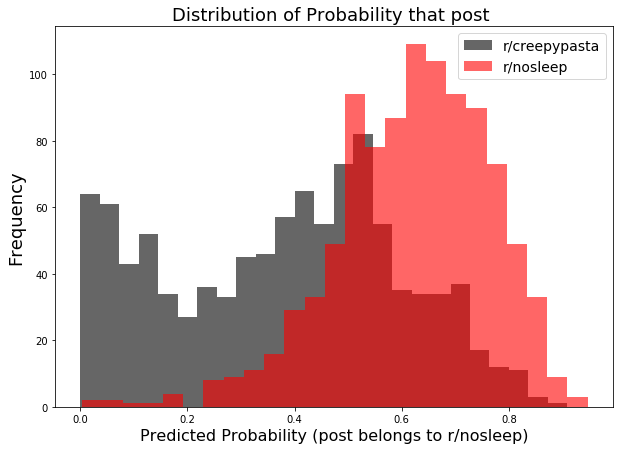

In [20]:
plt.figure(figsize = (10,7))

plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='black',
         alpha = 0.6,
         label='r/creepypasta')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='red',
         alpha = 0.6,
         label='r/nosleep')

plt.title('Distribution of Probability that post ', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability (post belongs to r/nosleep)', fontsize=16)

plt.legend(fontsize=14);

## Adding 20 most common words found in corpus to stop words, ref EDA notebook

In [21]:
common = ['like', 'back', 'one', 'could', 'said', 'would', 'time', 'know', 'see',
       'something', 'get', 'around', 'looked', 'door', 'even', 'eyes', 'still',
       'room', 'got', 'us']

In [22]:
for i in stopwords.words("english"):
    common.append(i)

### model won't run with max_features=None, changed max_features=5000

In [26]:
tf = TfidfVectorizer(stop_words=common,
                     max_features=5000,
                     ngram_range=(1,1),
                     strip_accents='ascii'
                     #min_df=0.005 
                    )

tf.fit(X_train)
X_train_tf = tf.transform(X_train).todense()
X_test_tf = tf.transform(X_test).todense()

In [24]:
lr = LogisticRegression(solver='saga',
                        penalty='l2')

lr.fit(X_train_tf, y_train)
print(lr.score(X_train_tf, y_train), lr.score(X_test_tf, y_test))

cross_val_score(lr, X_train_tf, y_train, cv=5).mean()

0.815 0.725


0.7107524879404249

In [27]:
preds = lr.predict(X_test_tf)

confusion_matrix(y_test, 
                 preds)

array([[671, 341],
       [182, 806]])

array([[640, 372],
       [178, 810]])

In [28]:
roc_auc_score(y_test, preds)

0.726124561936919

In [29]:
pred_proba = [i[1] for i in lr.predict_proba(X_test_tf)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': pred_proba})

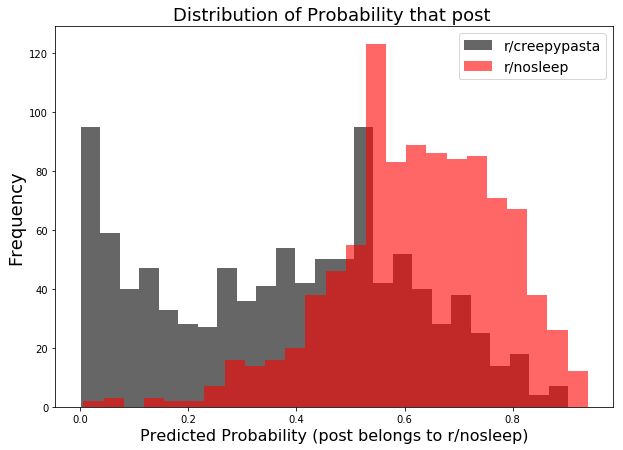

In [30]:
plt.figure(figsize = (10,7))

plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='black',
         alpha = 0.6,
         label='r/creepypasta')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='red',
         alpha = 0.6,
         label='r/nosleep')

plt.title('Distribution of Probability that post ', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability (post belongs to r/nosleep)', fontsize=16)

plt.legend(fontsize=14);

## when adding stop words with the unclean data both the roc score and the accuracy went down, True Negatives increased (more posts were correctly classified as creepypasta) but more creepy pasta posts were also classified incorrectly, hence False Postives also increased